In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import matplotlib.cm as cmaps
import math

# nx = ny = 128 const, nz varies

In [3]:
df_nz = pd.read_csv("stencil_gpu_scaling_265510.csv")
df_nz.head()

,Nx,Ny,Nz,NUM_ITER,NUM_STREAMS,Time
0,128,128,8,32,1,0.001981
1,128,128,8,32,2,0.001855
2,128,128,8,32,4,0.001820
3,128,128,8,32,8,0.001999
4,128,128,8,32,16,0.002447


In [4]:
nz = df_nz["Nz"].unique()
print(nz)

numiters = df_nz["NUM_ITER"].unique()
print(numiters)

numstreams = df_nz["NUM_STREAMS"].unique()
print(numstreams)

gridx = df_nz["Nx"].unique()
print(gridx)

[    8    16    32    64   128   256   512  1024  2048  4096  8192 16384
 32768 65536]
[  32   64  128  256  512 1024]
[  1   2   4   8  16  32  64 128 256]
[128]


In [5]:
numstreams = df_nz['NUM_STREAMS'].unique()
nz = df_nz['Nz'].unique()
nz_second = nz[::2]
print(nz_second)

[    8    32   128   512  2048  8192 32768]


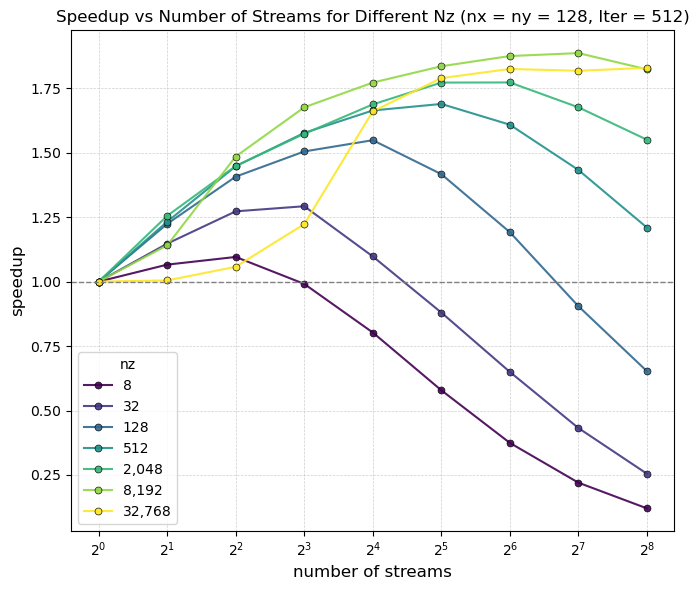

In [6]:
####### use for report #############################

tsteps = 512 

plt.figure(figsize=(8, 6)) 

colors = plt.cm.viridis(np.linspace(0, 1, len(nz_second)))



for idx, nzs in enumerate(nz_second):
    sub_df = df_nz[(df_nz['NUM_ITER'] == tsteps) & (df_nz['Nz'] == nzs)]
    
    if sub_df.empty:
            print(f"Warning: No data for Num_Iter={tsteps} and nz={nzs}")
            continue  # Skip this iteration

    times = np.array(sub_df['Time'])
    improvement = times[0] / times

    plt.plot(sub_df['NUM_STREAMS'], improvement,
                 marker='o',                # Dots
                 markersize=5,              # Similar to s=10 in scatter
                 alpha=0.9,                 # Transparency
                 markeredgecolor='black',  # Edge color
                 markeredgewidth=0.5,      # Edge thickness
                 label=f'{nzs:,}',
                 color=colors[idx])

plt.xscale('log', base = 2)
#plt.yscale('log')
plt.xlabel('number of streams', fontsize=12)
plt.ylabel('speedup', fontsize=12)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), title='nz')
plt.title(f"Speedup vs Number of Streams for Different Nz (nx = ny = 128, Iter = {tsteps})")
plt.grid(True, which='both', linestyle='--', linewidth=0.5, alpha=0.6)
plt.axhline(1, color='gray', linestyle='--', linewidth=1)
plt.tight_layout()
plt.legend(title="nz", loc='best', fontsize='medium', title_fontsize='medium')
# plt.savefig(f"stencil_speedup_streams_nz.pdf")
plt.show()

In [7]:
df_gt4py_gpu = pd.read_csv("stencil_gt4py_gpu_306785.csv")
df_gt4py_gpu_notrafo = pd.read_csv("stencil_gt4py_gpu_notransfer_308524.csv")

In [8]:
df_gt4py_gpu

,Nx,Ny,Nz,NUM_ITER,Time
0,128,128,8,32,0.363128
1,128,128,8,64,0.725378
2,128,128,8,128,1.447942
3,128,128,8,256,2.891085
4,128,128,8,512,5.778235
...,...,...,...,...,...
61,128,128,8192,64,4.762758
62,128,128,8192,128,5.502334
63,128,128,8192,256,7.008234
64,128,128,8192,512,10.038262


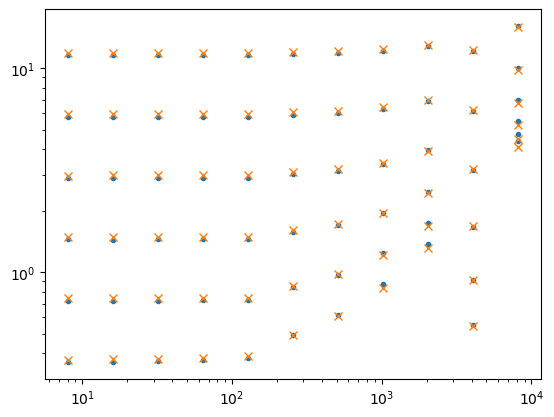

In [9]:
plt.loglog(df_gt4py_gpu['Nz'], df_gt4py_gpu['Time'], ".")
plt.loglog(df_gt4py_gpu_notrafo['Nz'], df_gt4py_gpu_notrafo['Time'], "x")
# plt.loglog(df2_1stream['Size'], df2_1stream['Time'], ".")

In [10]:
df_nz_1stream = df_nz[df_nz["NUM_STREAMS"] == 1].drop(["NUM_STREAMS"], axis=1)
df_nz_1str = df_nz_1stream[df_nz_1stream["Nz"] <= 2**13]
df_nz_1str

,Nx,Ny,Nz,NUM_ITER,Time
0,128,128,8,32,0.001981
9,128,128,8,64,0.003529
18,128,128,8,128,0.006804
27,128,128,8,256,0.013075
36,128,128,8,512,0.025654
...,...,...,...,...,...
549,128,128,8192,64,1.765340
558,128,128,8192,128,3.461890
567,128,128,8192,256,7.146840
576,128,128,8192,512,14.156800


In [11]:
df_nz

,Nx,Ny,Nz,NUM_ITER,NUM_STREAMS,Time
0,128,128,8,32,1,0.001981
1,128,128,8,32,2,0.001855
2,128,128,8,32,4,0.001820
3,128,128,8,32,8,0.001999
4,128,128,8,32,16,0.002447
...,...,...,...,...,...,...
751,128,128,65536,1024,16,55.877400
752,128,128,65536,1024,32,41.869000
753,128,128,65536,1024,64,38.708100
754,128,128,65536,1024,128,38.448300


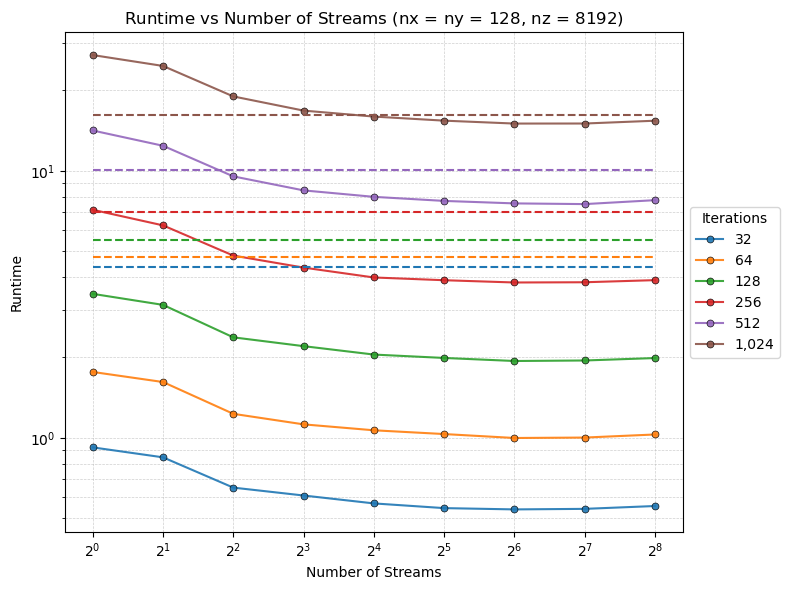

In [31]:
numstreams = df_nz['NUM_STREAMS'].unique()
numiters = df_nz['NUM_ITER'].unique()

plt.figure(figsize=(8, 6))

nz_fix = 2**13

df_gt_nz = df_gt4py_gpu[df_gt4py_gpu['Nz'] == nz_fix]

for idx, tsteps in enumerate(numiters):
    sub_df = df_nz[(df_nz['NUM_ITER'] == tsteps) & (df_nz['Nz'] == nz_fix)]
    times = np.array(sub_df['Time'])
    improvement = times[0] / times

    plt.plot(sub_df['NUM_STREAMS'], times,
                 marker='o',                # Dots
                 markersize=5,              # Similar to s=10 in scatter
                 alpha=0.9,                 # Transparency
                 markeredgecolor='black',  # Edge color
                 markeredgewidth=0.5,      # Edge thickness
                 label=f'{tsteps:,}')

plt.xscale('log', base = 2)
plt.yscale('log')
plt.xlabel('Number of Streams')
plt.ylabel('Runtime')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), title='Iterations')
plt.title(f"Runtime vs Number of Streams (nx = ny = 128, nz = ${nz_fix}$)")
plt.grid(True, which='both', linestyle='--', linewidth=0.5, alpha=0.6)

for i,n in enumerate(numiters):
    t_gt4py = df_gt_nz[df_gt_nz['NUM_ITER'] == n]['Time']
    plt.plot([1,2**8], 2*[t_gt4py], '--', color=f'C{i}')

# Add space on the right for the legend
plt.subplots_adjust(right=0.75)
plt.tight_layout()
plt.savefig(f"stencil_runtime_vs_gt4py.pdf")
plt.show()

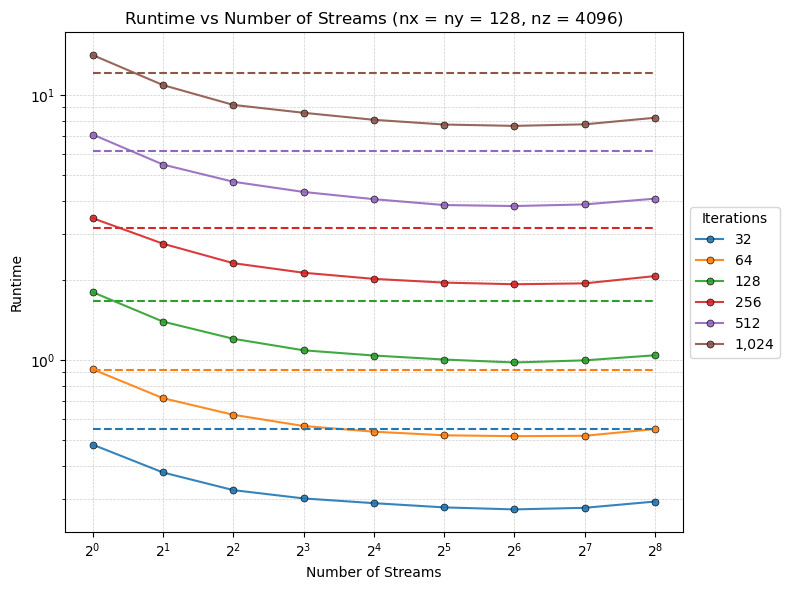

In [33]:
numstreams = df_nz['NUM_STREAMS'].unique()
numiters = df_nz['NUM_ITER'].unique()

plt.figure(figsize=(8, 6))

nz_fix = 2**12

df_gt_nz = df_gt4py_gpu[df_gt4py_gpu['Nz'] == nz_fix]

for idx, tsteps in enumerate(numiters):
    sub_df = df_nz[(df_nz['NUM_ITER'] == tsteps) & (df_nz['Nz'] == nz_fix)]
    times = np.array(sub_df['Time'])
    improvement = times[0] / times

    plt.plot(sub_df['NUM_STREAMS'], times,
                 marker='o',                # Dots
                 markersize=5,              # Similar to s=10 in scatter
                 alpha=0.9,                 # Transparency
                 markeredgecolor='black',  # Edge color
                 markeredgewidth=0.5,      # Edge thickness
                 label=f'{tsteps:,}')

plt.xscale('log', base = 2)
plt.yscale('log')
plt.xlabel('Number of Streams')
plt.ylabel('Runtime')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), title='Iterations')
plt.title(f"Runtime vs Number of Streams (nx = ny = 128, nz = ${nz_fix}$)")
plt.grid(True, which='both', linestyle='--', linewidth=0.5, alpha=0.6)

for i,n in enumerate(numiters):
    t_gt4py = df_gt_nz[df_gt_nz['NUM_ITER'] == n]['Time']
    plt.plot([1,2**8], 2*[t_gt4py], '--', color=f'C{i}')

# Add space on the right for the legend
plt.subplots_adjust(right=0.75)
plt.tight_layout()
plt.savefig(f"stencil_runtime_vs_gt4py_2.pdf")
plt.show()

In [55]:
def plotnfit_time_of_iter(df, lbl=None, color='C0', ax=plt):
    ax.plot(df['NUM_ITER'], df['Time'], f'.{color}', markeredgecolor='black', label=lbl , markersize=9)

    prm = np.polyfit(df['NUM_ITER'], df['Time'], deg=1)
    fit_fct = np.poly1d(prm)
    x_numiters = np.array([0, 1050])
    y_t_fit = fit_fct(x_numiters)
    ax.plot(x_numiters, y_t_fit, f'-{color}', zorder=0, alpha=0.7)

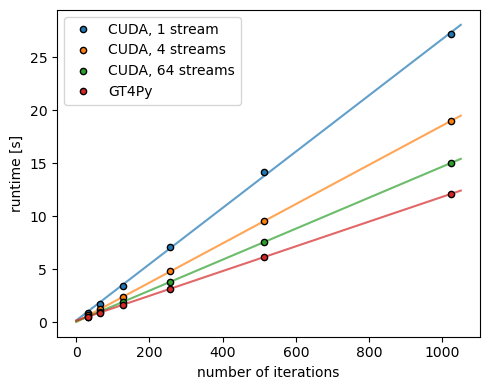

In [56]:
plt.figure(figsize=(5,4))
df_nz_1stream_ = df_nz[(df_nz["NUM_STREAMS"] == 1) & (df_nz['Nz'] == nz_fix)]
plotnfit_time_of_iter(df_nz_1stream_, "CUDA, 1 stream", "C0")
plotnfit_time_of_iter(df_nz[(df_nz['NUM_STREAMS'] == 4) & (df_nz['Nz'] == nz_fix)], "CUDA, 4 streams", "C1")
df_nz_64streams = df_nz[(df_nz['NUM_STREAMS'] == 64) & (df_nz['Nz'] == nz_fix)]
plotnfit_time_of_iter(df_nz_64streams, "CUDA, 64 streams", "C2")
plotnfit_time_of_iter(df_gt_nz, "GT4Py", "C3")
plt.legend(loc='best')
plt.xlabel("number of iterations")
plt.ylabel("runtime [s]")
plt.tight_layout()
plt.savefig("stencil_runtime_fit.pdf")

In [ ]:
nz_gt = df_gt4py_gpu['Nz'].unique()
display(nz_gt)  # smaller than nz from df_nz

array([   8,   16,   32,   64,  128,  256,  512, 1024, 2048, 4096, 8192])

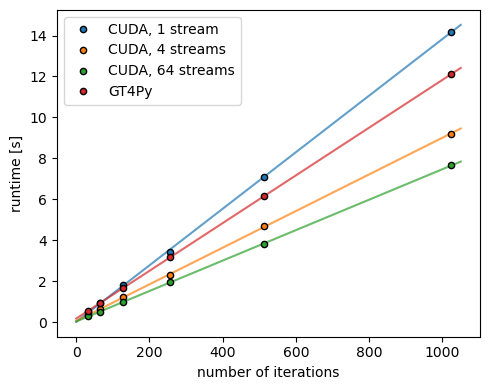

In [ ]:

nz_fix = 4096
assert(nz_fix in nz_gt)

plt.figure(figsize=(5,4))
plotnfit_time_of_iter(df_nz[(df_nz["NUM_STREAMS"] == 1) & (df_nz['Nz'] == nz_fix)], "CUDA, 1 stream", "C0")
plotnfit_time_of_iter(df_nz[(df_nz['NUM_STREAMS'] == 4) & (df_nz['Nz'] == nz_fix)], "CUDA, 4 streams", "C1")
plotnfit_time_of_iter(df_nz[(df_nz['NUM_STREAMS'] == 64) & (df_nz['Nz'] == nz_fix)], "CUDA, 64 streams", "C2")
plotnfit_time_of_iter(df_gt4py_gpu[df_gt4py_gpu['Nz'] == nz_fix], "GT4Py", "C3")
plt.legend(loc='best')
plt.xlabel("number of iterations")
plt.ylabel("runtime [s]")
plt.tight_layout()
plt.savefig(f"stencil_runtime_fit_nz={nz_fix}.pdf")

In [39]:
df_gt4096 = df_gt4py_gpu[df_gt4py_gpu['Nz'] == 4096]
# df_gt4096 = df_gt4py_gpu[df_gt4py_gpu['Nz'] == 8192]
np.polyfit(df_gt4096["NUM_ITER"], df_gt4096["Time"], deg=1)

array([0.01166075, 0.17373883])

In [54]:
def plotnfit_time_of_iter2(df, lbl=None, color='C0', ax=plt):
    ax.plot(df['NUM_ITER'], df['Time'], f'*{color}', markeredgecolor='black', label=lbl , markersize=8)

    prm = np.polyfit(df['NUM_ITER'], df['Time'], deg=1)
    fit_fct = np.poly1d(prm)
    x_numiters = np.array([0, 1050])
    y_t_fit = fit_fct(x_numiters)
    ax.plot(x_numiters, y_t_fit, f'--{color}', zorder=0, alpha=0.7)

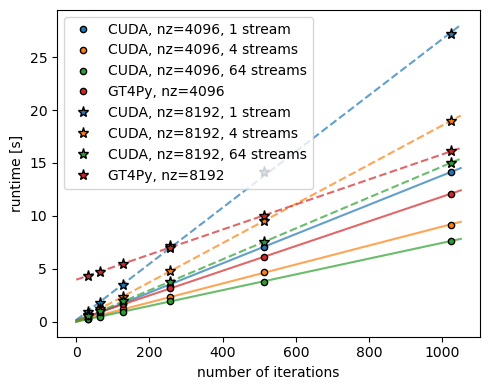

In [46]:
plt.figure(figsize=(5,4))
nz_fix  = 4096
assert(nz_fix  in nz_gt)
plotnfit_time_of_iter(df_nz[(df_nz["NUM_STREAMS"] == 1) & (df_nz['Nz'] == nz_fix)], f"CUDA, nz={nz_fix}, 1 stream", "C0")
plotnfit_time_of_iter(df_nz[(df_nz['NUM_STREAMS'] == 4) & (df_nz['Nz'] == nz_fix)], f"CUDA, nz={nz_fix}, 4 streams", "C1")
plotnfit_time_of_iter(df_nz[(df_nz['NUM_STREAMS'] == 64) & (df_nz['Nz'] == nz_fix)], f"CUDA, nz={nz_fix}, 64 streams", "C2")
plotnfit_time_of_iter(df_gt4py_gpu[df_gt4py_gpu['Nz'] == nz_fix], f"GT4Py, nz={nz_fix}", "C3")
nz_fix = 8192
assert(nz_fix  in nz_gt)
plotnfit_time_of_iter2(df_nz[(df_nz["NUM_STREAMS"] == 1) & (df_nz['Nz'] == nz_fix)], f"CUDA, nz={nz_fix}, 1 stream", "C0")
plotnfit_time_of_iter2(df_nz[(df_nz['NUM_STREAMS'] == 4) & (df_nz['Nz'] == nz_fix)], f"CUDA, nz={nz_fix}, 4 streams", "C1")
plotnfit_time_of_iter2(df_nz[(df_nz['NUM_STREAMS'] == 64) & (df_nz['Nz'] == nz_fix)], f"CUDA, nz={nz_fix}, 64 streams", "C2")
plotnfit_time_of_iter2(df_gt4py_gpu[df_gt4py_gpu['Nz'] == nz_fix], f"GT4Py, nz={nz_fix}", "C3")
plt.legend(loc='best')
plt.xlabel("number of iterations")
plt.ylabel("runtime [s]")
plt.tight_layout()
# plt.savefig(f"stencil_runtime_fit_combi.pdf")

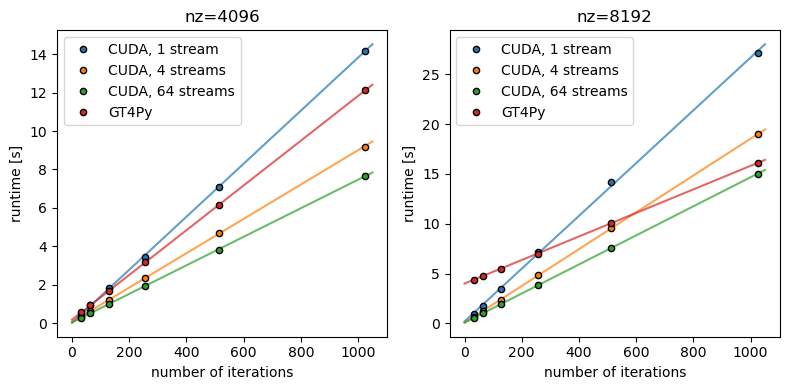

In [67]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8,4))

nz_fix  = 4096
assert(nz_fix  in nz_gt)
ax1.set_title(f"nz={nz_fix}")
plotnfit_time_of_iter(df_nz[(df_nz["NUM_STREAMS"] == 1) & (df_nz['Nz'] == nz_fix)], f"CUDA, 1 stream", "C0", ax=ax1)
plotnfit_time_of_iter(df_nz[(df_nz['NUM_STREAMS'] == 4) & (df_nz['Nz'] == nz_fix)], f"CUDA, 4 streams", "C1", ax=ax1)
plotnfit_time_of_iter(df_nz[(df_nz['NUM_STREAMS'] == 64) & (df_nz['Nz'] == nz_fix)], f"CUDA, 64 streams", "C2", ax=ax1)
plotnfit_time_of_iter(df_gt4py_gpu[df_gt4py_gpu['Nz'] == nz_fix], f"GT4Py", "C3", ax=ax1)
ax1.legend(loc='best')
ax1.set_xlabel("number of iterations")
ax1.set_ylabel("runtime [s]")
nz_fix = 8192
assert(nz_fix  in nz_gt)
ax2.set_title(f"nz={nz_fix}")
plotnfit_time_of_iter(df_nz[(df_nz["NUM_STREAMS"] == 1) & (df_nz['Nz'] == nz_fix)], f"CUDA, 1 stream", "C0", ax=ax2)
plotnfit_time_of_iter(df_nz[(df_nz['NUM_STREAMS'] == 4) & (df_nz['Nz'] == nz_fix)], f"CUDA, 4 streams", "C1", ax=ax2)
plotnfit_time_of_iter(df_nz[(df_nz['NUM_STREAMS'] == 64) & (df_nz['Nz'] == nz_fix)], f"CUDA, 64 streams", "C2", ax=ax2)
plotnfit_time_of_iter(df_gt4py_gpu[df_gt4py_gpu['Nz'] == nz_fix], f"GT4Py", "C3", ax=ax2)
ax2.legend(loc='best')
ax2.set_xlabel("number of iterations")
ax2.set_ylabel("runtime [s]")
plt.tight_layout()
plt.savefig(f"stencil_runtime_fit_combi.pdf")